In [1]:
# data wrangling & pre-processing
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

#model validation
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics

# cross validation
from sklearn.model_selection import StratifiedKFold

# machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
import xgboost as xgb

from scipy import stats

In [3]:
# reading heart disease dataset
dt = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')
dt

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [4]:
# renaming features to proper name
dt.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 
               'rest_ecg', 'max_heart_rate_achieved','exercise_induced_angina', 'st_depression', 
               'st_slope','target']

In [5]:
dt

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [6]:
# converting features to categorical features 
dt['chest_pain_type'][dt['chest_pain_type'] == 1] = 'typical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 2] = 'atypical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 3] = 'non-anginal pain'
dt['chest_pain_type'][dt['chest_pain_type'] == 4] = 'asymptomatic'

dt['rest_ecg'][dt['rest_ecg'] == 0] = 'normal'
dt['rest_ecg'][dt['rest_ecg'] == 1] = 'ST-T wave abnormality'
dt['rest_ecg'][dt['rest_ecg'] == 2] = 'left ventricular hypertrophy'

dt['st_slope'][dt['st_slope'] == 1] = 'upsloping'
dt['st_slope'][dt['st_slope'] == 2] = 'flat'
dt['st_slope'][dt['st_slope'] == 3] = 'downsloping'

dt["sex"] = dt.sex.apply(lambda  x:'male' if x==1 else 'female')

C:\Users\US\AppData\Local\Temp\ipykernel_4016\388031784.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dt['chest_pain_type'][dt['chest_pain_type'] == 1] = 'typical angina'
C:\Users\US\AppData\Local\Temp\ipykernel_4016\388031784.py:2: Se

In [7]:
dt

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,target
0,40,male,atypical angina,140,289,0,normal,172,0,0.0,upsloping,0
1,49,female,non-anginal pain,160,180,0,normal,156,0,1.0,flat,1
2,37,male,atypical angina,130,283,0,ST-T wave abnormality,98,0,0.0,upsloping,0
3,48,female,asymptomatic,138,214,0,normal,108,1,1.5,flat,1
4,54,male,non-anginal pain,150,195,0,normal,122,0,0.0,upsloping,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,male,typical angina,110,264,0,normal,132,0,1.2,flat,1
1186,68,male,asymptomatic,144,193,1,normal,141,0,3.4,flat,1
1187,57,male,asymptomatic,130,131,0,normal,115,1,1.2,flat,1
1188,57,female,atypical angina,130,236,0,left ventricular hypertrophy,174,0,0.0,flat,1


# distribution of categorical variables

In [8]:
dt['chest_pain_type'].value_counts()

chest_pain_type
asymptomatic        625
non-anginal pain    283
atypical angina     216
typical angina       66
Name: count, dtype: int64

In [9]:
dt['rest_ecg'].value_counts()

rest_ecg
normal                          684
left ventricular hypertrophy    325
ST-T wave abnormality           181
Name: count, dtype: int64

In [10]:
dt['st_slope'].value_counts()

st_slope
flat           582
upsloping      526
downsloping     81
0                1
Name: count, dtype: int64

 distribution of st_slope, the value 0 has only 1 record and the 0 value also has no description in the dataset description. So we will remove the record having a st_slope value of 0.



In [12]:
#dropping row with st_slope =0
dt.drop(dt[dt.st_slope ==0].index, inplace=True)

In [14]:
dt

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,target
0,40,male,atypical angina,140,289,0,normal,172,0,0.0,upsloping,0
1,49,female,non-anginal pain,160,180,0,normal,156,0,1.0,flat,1
2,37,male,atypical angina,130,283,0,ST-T wave abnormality,98,0,0.0,upsloping,0
3,48,female,asymptomatic,138,214,0,normal,108,1,1.5,flat,1
4,54,male,non-anginal pain,150,195,0,normal,122,0,0.0,upsloping,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,male,typical angina,110,264,0,normal,132,0,1.2,flat,1
1186,68,male,asymptomatic,144,193,1,normal,141,0,3.4,flat,1
1187,57,male,asymptomatic,130,131,0,normal,115,1,1.2,flat,1
1188,57,female,atypical angina,130,236,0,left ventricular hypertrophy,174,0,0.0,flat,1


In [16]:

## Checking missing entries in the dataset columnwise
dt.isna().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
target                     0
dtype: int64

# 2.EDA

In [17]:
# first checking the shape of the dataset
dt.shape

(1189, 12)

In [18]:
# summary statistics of numerical columns
dt.describe(include =[np.number])

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,target
count,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000
mean,53.708158,132.138772,210.376787,0.212784,139.739277,0.387721,0.923549,0.528175
std,9.352961,18.369251,101.462185,0.409448,25.527386,0.487435,1.086464,0.499416
min,28.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,120.000000,188.000000,0.000000,121.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,229.000000,0.000000,141.000000,0.000000,0.600000,1.000000
75%,60.000000,140.000000,270.000000,0.000000,160.000000,1.000000,1.600000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000


Resting_blood_pressure and cholesterol have some outliers as they have minimum value of 0 whereas cholesterol has outlier on upper side also having maximum value of 603.

# Distribution of target variable

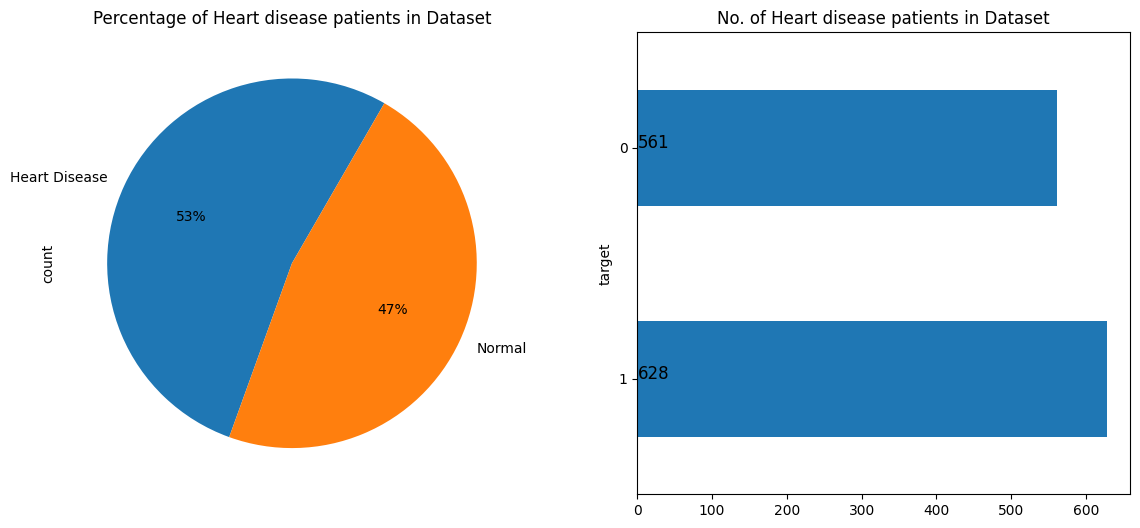

In [20]:
# Plotting attrition of employees
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

ax1 = dt['target'].value_counts().plot.pie( x="Heart disease" ,y ='no.of patients', 
                   autopct = "%1.0f%%",labels=["Heart Disease","Normal"], startangle = 60,ax=ax1);
ax1.set(title = 'Percentage of Heart disease patients in Dataset')

ax2 = dt["target"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(dt["target"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'No. of Heart disease patients in Dataset')
plt.show()

balanced dataset with normat and diseased patients

# Distribution of Age and Gender

C:\Users\US\AppData\Local\Temp\ipykernel_4016\1874319495.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax= sns.distplot(dt['age'], rug=True)


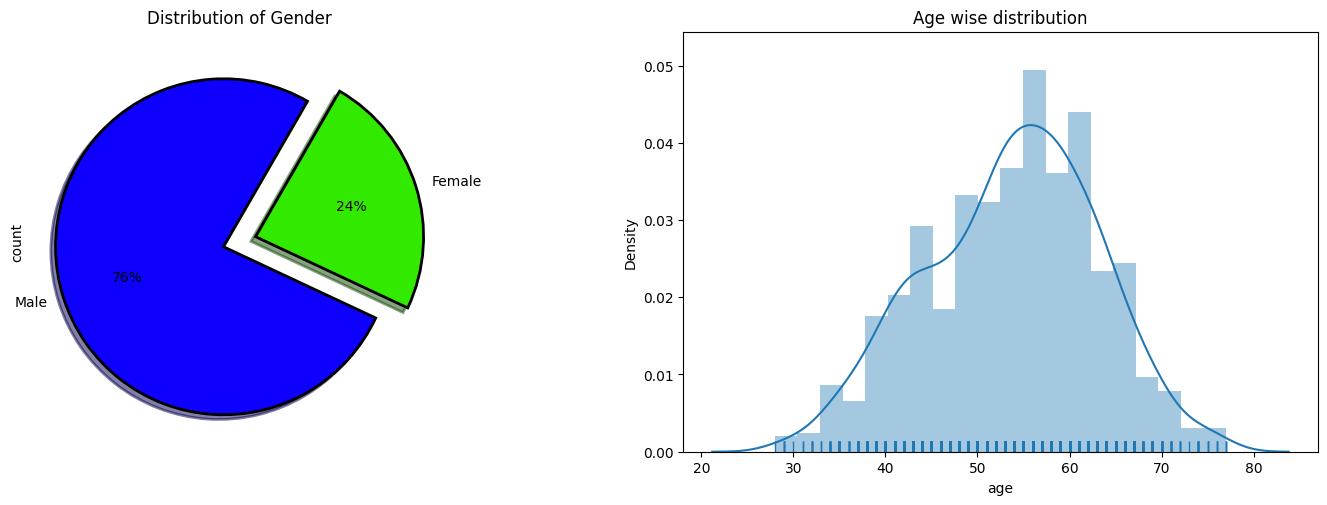

In [21]:
plt.figure(figsize=(18,12))
plt.subplot(221)
dt["sex"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",5),startangle = 60,labels=["Male","Female"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow =True)
plt.title("Distribution of Gender")
plt.subplot(222)
ax= sns.distplot(dt['age'], rug=True)
plt.title("Age wise distribution")
plt.show()

# Heart disease-wise distribution of Age and Gender

C:\Users\US\AppData\Local\Temp\ipykernel_4016\3607906623.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(attr_0['age'])
C:\Users\US\AppData\Local\Temp\ipykernel_4016\3607906623.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(attr_0['sex'], palette='viridis')


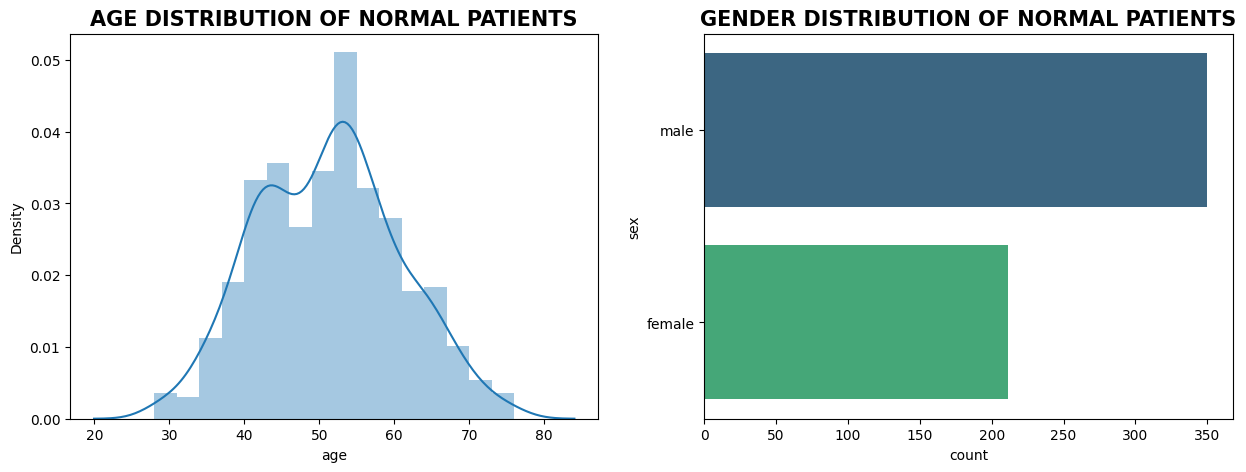

C:\Users\US\AppData\Local\Temp\ipykernel_4016\3607906623.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(attr_1['age'])
C:\Users\US\AppData\Local\Temp\ipykernel_4016\3607906623.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(attr_1['sex'], palette='viridis')


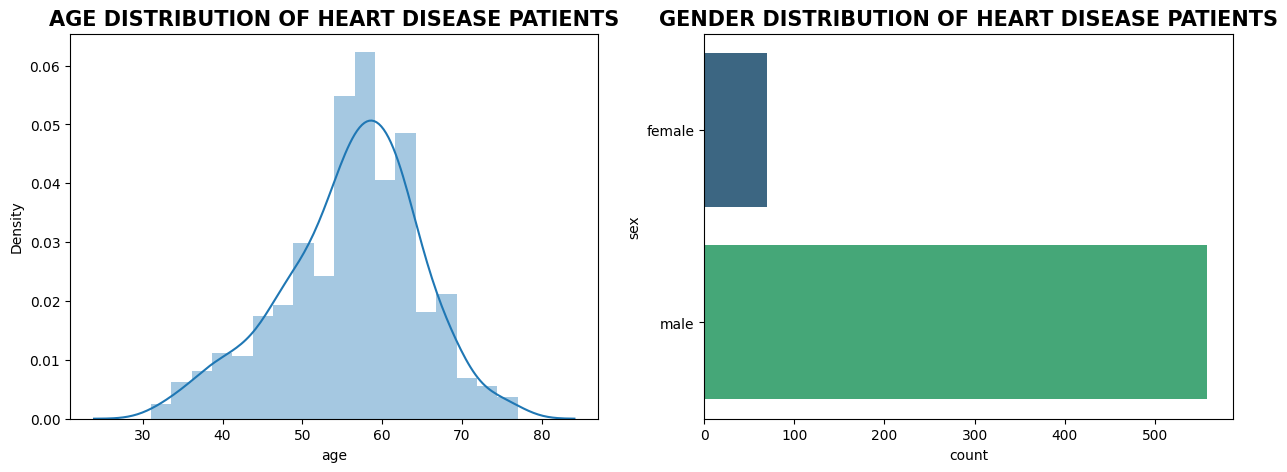

In [24]:
# creating separate df for normal and heart patients

attr_1=dt[dt['target']==1]

attr_0=dt[dt['target']==0]

# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_0['age'])
plt.title('AGE DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_0['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold' )
plt.show()

#plotting heart patients

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_1['age'])
plt.title('AGE DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold' )
plt.show()

# distribution of chest pain type

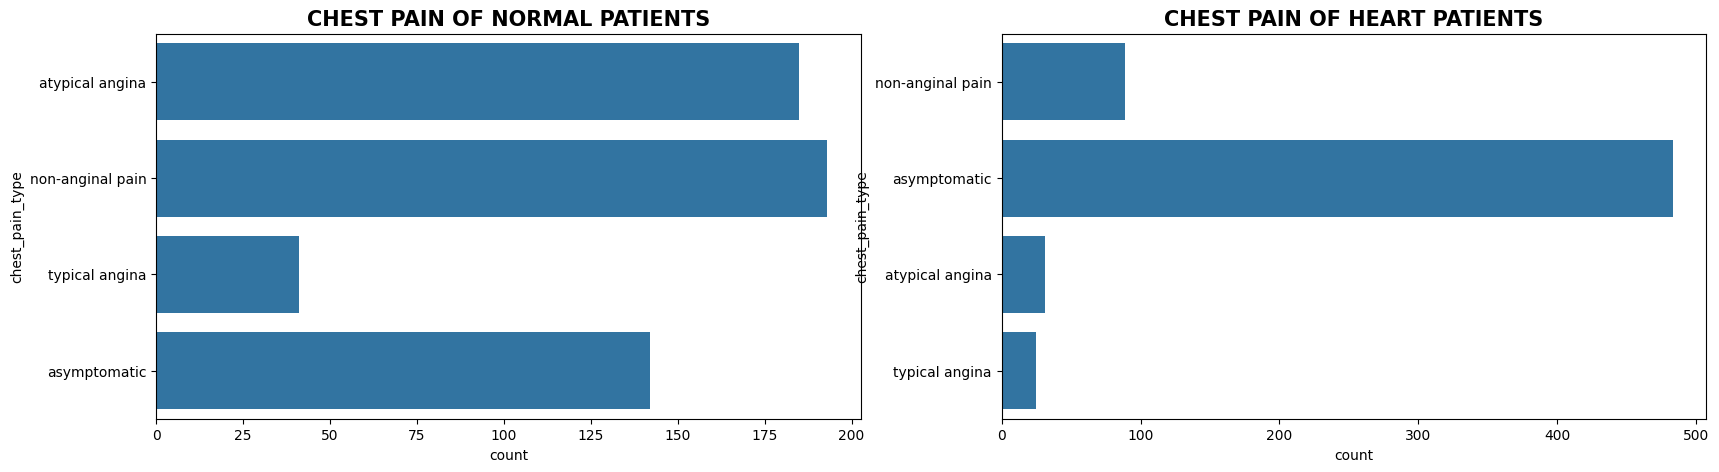

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting normal patients
fig = plt.figure(figsize=(20, 5))
ax1 = plt.subplot2grid((1, 2), (0, 0))
sns.countplot(attr_0['chest_pain_type'])
plt.title('CHEST PAIN OF NORMAL PATIENTS', fontsize=15, weight='bold')

# Plotting heart patients without palette
ax1 = plt.subplot2grid((1, 2), (0, 1))
sns.countplot(attr_1['chest_pain_type'])
plt.title('CHEST PAIN OF HEART PATIENTS', fontsize=15, weight='bold')
plt.show()


In [35]:
#Exploring the Heart Disease patients based on Chest Pain Type
plot_criteria= ['chest_pain_type', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(dt[plot_criteria[0]], dt[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
chest_pain_type,,
asymptomatic,25.310000,76.910000
atypical angina,32.980000,4.940000
non-anginal pain,34.400000,14.170000
typical angina,7.310000,3.980000


 76.91% of the chest pain type of heart disease patients have asymptomatic chest pain.

Asymptomatic heart attacks also known as silent myocardial infarction (SMI) cause around 45-50% of casualties due to cardiac ailments and lead to premature deaths in India.

The symptoms of SMI are very mild in comparison to a regular heart attack; Due to its mild nature, it is also described as a silent killer. 

# distribution of ECG

C:\Users\US\AppData\Local\Temp\ipykernel_4016\3014099359.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(attr_1['rest_ecg'], palette='viridis')


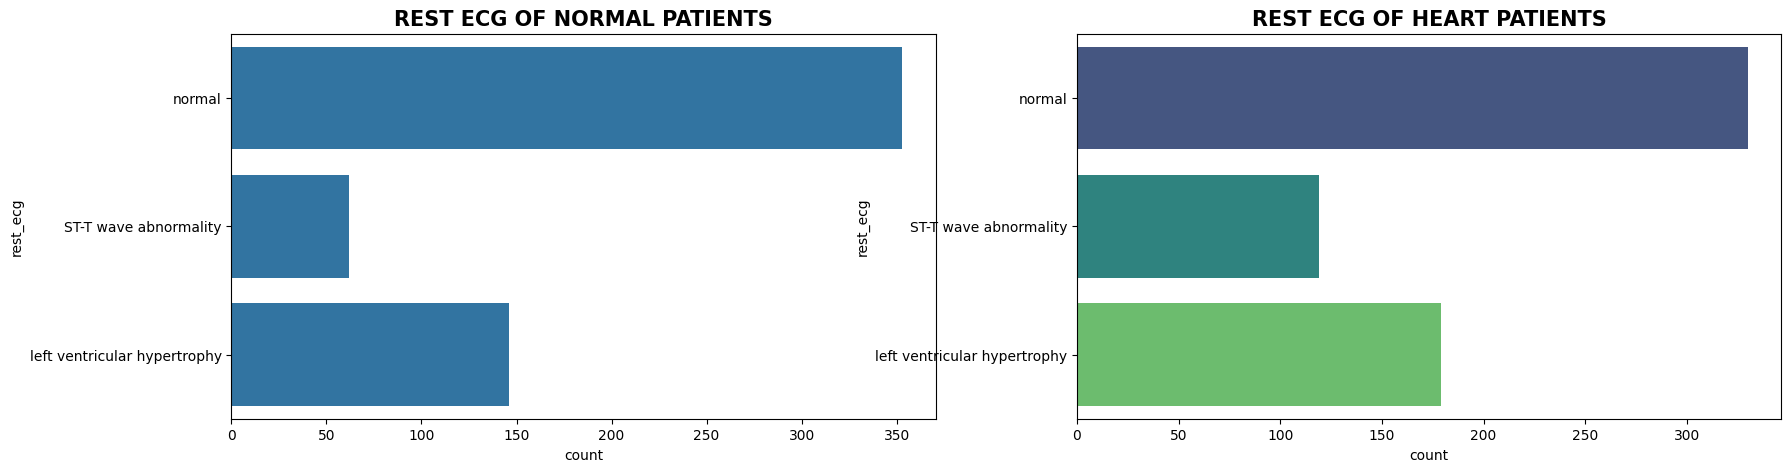

In [37]:
# plotting normal patients
fig = plt.figure(figsize=(20,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['rest_ecg'])
plt.title('REST ECG OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['rest_ecg'], palette='viridis')
plt.title('REST ECG OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [38]:
#Exploring the Heart Disease patients based on REST ECG
plot_criteria= ['rest_ecg', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(dt[plot_criteria[0]], dt[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
rest_ecg,,
ST-T wave abnormality,11.050000,18.950000
left ventricular hypertrophy,26.020000,28.500000
normal,62.920000,52.550000


An electrocardiogram (ECG) records the electrical signals of your heart. It’s a common diagnostic test for diagnosing heart problems and monitoring the status of the heart in varied situations. However, ECG also has some of its limitations in detecting heart disease as it measures heart rate and rhythm of the heart but sometimes it doesn’t necessarily show blockages in the arteries and that’s the reason in this dataset around 52% of heart disease patients have normal ECG.

# Distribution of ST-Slope

C:\Users\US\AppData\Local\Temp\ipykernel_4016\587881340.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(attr_1['st_slope'], palette='viridis')


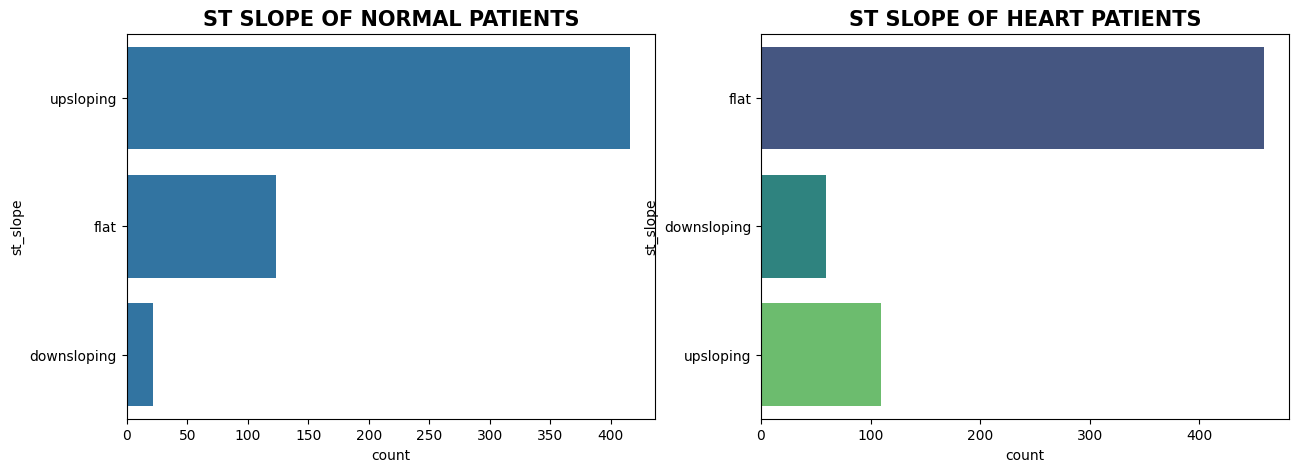

In [39]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['st_slope'])
plt.title('ST SLOPE OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['st_slope'], palette='viridis')
plt.title('ST SLOPE OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [40]:
#Exploring the Heart Disease patients based on ST Slope
plot_criteria= ['st_slope', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(dt[plot_criteria[0]], dt[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
st_slope,,
downsloping,3.920000,9.390000
flat,21.930000,73.090000
upsloping,74.150000,17.520000


As we can see from the above plot upsloping is a positive sign as 74% of the normal patients have upslope whereas 72.97% of heart patients have flat sloping.


The ST segment /heart rate slope (ST/HR slope), has been proposed as a more accurate ECG criterion for diagnosing significant coronary artery disease (CAD) in most of the research papers

# Distribution of Numerical features

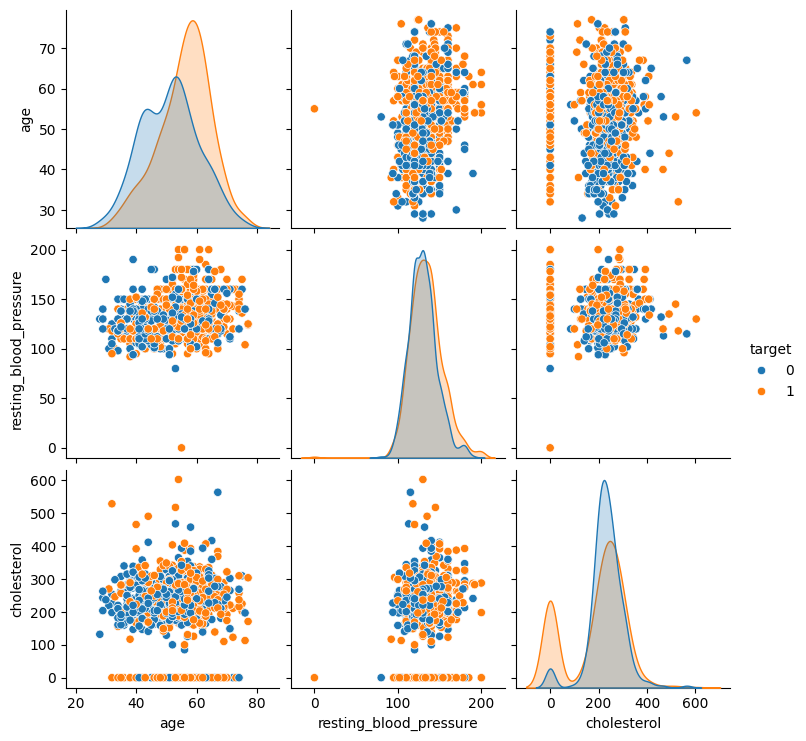

In [41]:
sns.pairplot(dt, hue = 'target', vars = ['age', 'resting_blood_pressure', 'cholesterol'] )

From the above plot, it is clear that as age increases chances of heart disease increases.

# Distribution of Cholesterol vs Resting BP

<Axes: xlabel='resting_blood_pressure', ylabel='cholesterol'>

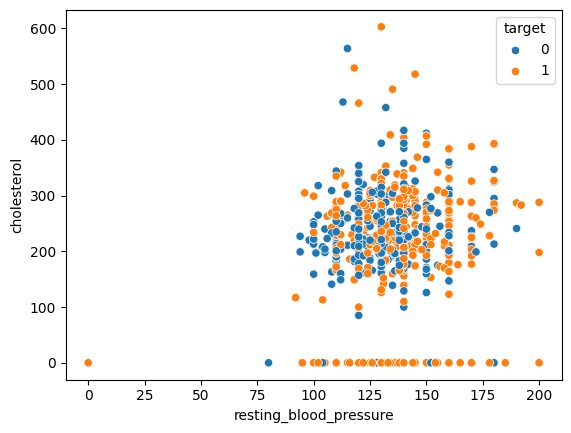

In [42]:
sns.scatterplot(x = 'resting_blood_pressure', y = 'cholesterol', hue = 'target', data = dt)

From the above plot, we can observe that higher cholesterol with high blood pressure levels results in heart disease whereas normal patients have both cholesterol and blood pressure within the nominal range.

# Outlier Detection & Removal

From the EDA we have found that numerical features i.e., age, resting blood pressure, cholesterol, and maximum heart rate achieved has outliers.

In [43]:
# filtering numeric features as age , resting bp, cholestrol and max heart rate achieved has outliers as per EDA

dt_numeric = dt[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved']]

# calculating zscore of numeric columns in the dataset
z = np.abs(stats.zscore(dt_numeric))
print(z)

           age  resting_blood_pressure  cholesterol  max_heart_rate_achieved
0     1.466266                0.428136     0.775228                 1.264301
1     0.503599                1.517370     0.299516                 0.637259
2     1.787155                0.116481     0.716067                 1.635766
3     0.610562                0.319212     0.035725                 1.243865
4     0.031216                0.972753     0.151616                 0.695204
...        ...                     ...          ...                      ...
1185  0.931451                1.205715     0.528727                 0.303303
1186  1.528698                0.645983     0.171336                 0.049408
1187  0.352105                0.116481     0.782658                 0.969535
1188  0.352105                0.116481     0.252646                 1.342681
1189  1.680192                0.319212     0.348816                 1.303491

[1189 rows x 4 columns]


defined threshold >3, i.e., points that are falling beyond 3 standard deviations both in case of large and small values will be treated as outliers.

In [44]:
# Defining threshold for filtering outliers 
threshold = 3
print(np.where(z > 3))

(array([  30,   76,  109,  149,  242,  366,  371,  391,  400,  450,  592,
        617,  733,  760, 1012, 1038, 1074], dtype=int64), array([2, 2, 1, 2, 1, 1, 3, 3, 1, 1, 1, 2, 1, 1, 1, 2, 1], dtype=int64))


first array denotes a list of row numbers and the second array respective column numbers, which means z[30][2] has a Z-score higher than 3. 

In [45]:
#filtering outliers retaining only those data points which are below threshhold
dt = dt[(z < 3).all(axis=1)]

In [46]:
dt.shape

(1172, 12)

17 datapoints were outliers and are now removed

In [47]:
## encoding categorical variables
dt = pd.get_dummies(dt, drop_first=True)

dt.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping
0,40,140,289,0,172,0,0.0,0,True,True,False,False,False,True,False,True
1,49,160,180,0,156,0,1.0,1,False,False,True,False,False,True,True,False
2,37,130,283,0,98,0,0.0,0,True,True,False,False,False,False,False,True
3,48,138,214,0,108,1,1.5,1,False,False,False,False,False,True,True,False
4,54,150,195,0,122,0,0.0,0,True,False,True,False,False,True,False,True


In [50]:
dt = dt.replace({True: 1, False: 0})

C:\Users\US\AppData\Local\Temp\ipykernel_4016\4213550427.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dt = dt.replace({True: 1, False: 0})


In [51]:
dt

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping
0,40,140,289,0,172,0,0.0,0,1,1,0,0,0,1,0,1
1,49,160,180,0,156,0,1.0,1,0,0,1,0,0,1,1,0
2,37,130,283,0,98,0,0.0,0,1,1,0,0,0,0,0,1
3,48,138,214,0,108,1,1.5,1,0,0,0,0,0,1,1,0
4,54,150,195,0,122,0,0.0,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,110,264,0,132,0,1.2,1,1,0,0,1,0,1,1,0
1186,68,144,193,1,141,0,3.4,1,1,0,0,0,0,1,1,0
1187,57,130,131,0,115,1,1.2,1,1,0,0,0,0,1,1,0
1188,57,130,236,0,174,0,0.0,1,0,1,0,0,1,0,1,0


# Creating Feature and Target variable

In [52]:
# segregating dataset into features i.e., X and target variables i.e., y
X = dt.drop(['target'],axis=1)
y = dt['target']

# Checking Correlation


<Axes: title={'center': 'Correlation with heart disease'}>

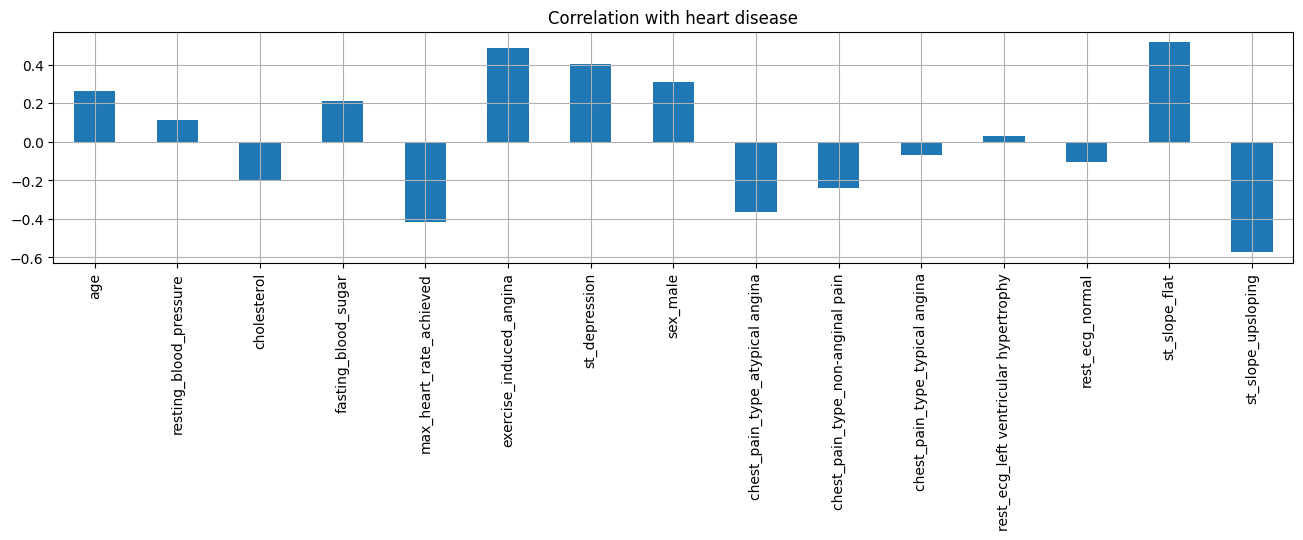

In [56]:
#Correlation with Response Variable class

X.corrwith(y).plot.bar(
        figsize = (16, 3), title = "Correlation with heart disease", fontsize = 10,
        rot = 90, grid = True)

excercise_induced_angina, st_slope_flat, st_depression and sex_male are highly positive correlated variables which signify that with an increase in their value chances of heart disease increases.

# Train Test Split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

## checking distribution of traget variable in train test split
print('Distribution of traget variable in training set')
print(y_train.value_counts())

print('Distribution of traget variable in test set')
print(y_test.value_counts())

print('------------Training Set------------------')
print(X_train.shape)
print(y_train.shape)

print('------------Test Set------------------')
print(X_test.shape)
print(y_test.shape)

Distribution of traget variable in training set
target
1    491
0    446
Name: count, dtype: int64
Distribution of traget variable in test set
target
1    123
0    112
Name: count, dtype: int64
------------Training Set------------------
(937, 15)
(937,)
------------Test Set------------------
(235, 15)
(235,)


# Feature Normalization


In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.fit_transform(X_train[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']])
X_train.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping
478,0.673469,0.193548,0.000000,1,0.303704,1,0.454545,1,0,0,0,0,1,0,0
253,0.673469,0.354839,0.594705,0,0.355556,1,0.194805,1,0,0,0,0,0,0,1
273,0.551020,0.516129,0.409369,0,0.466667,1,0.584416,1,0,0,0,0,1,1,0
111,0.591837,0.623656,0.519348,0,0.185185,1,0.584416,1,0,0,0,0,1,1,0
50,0.448980,0.408602,0.474542,0,0.400000,1,0.454545,1,0,0,0,0,1,1,0


In [60]:
X_test[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.transform(X_test[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']])
X_test.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping
1024,0.693878,0.301075,0.572301,0,0.266667,0,0.376623,1,1,0,0,1,0,1,0
182,0.469388,0.408602,0.456212,0,0.614815,0,0.194805,1,1,0,0,0,1,0,1
785,0.346939,0.494624,0.480652,0,0.629630,1,0.220779,0,0,0,0,1,0,1,0
924,0.591837,0.623656,0.562118,0,0.333333,1,0.272727,1,0,0,0,1,0,1,0
780,0.612245,0.387097,0.527495,0,0.466667,1,0.584416,1,0,0,0,1,0,1,0


# Cross-Validation

before training and testing machine learning model we will do 10-fold cross-validation to understand which machine learning model is performing well within the training set.

In [64]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier

# function initializing baseline machine learning models
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR_L2', LogisticRegression(penalty='l2')))
    basedModels.append(('KNN7', KNeighborsClassifier(7)))
    basedModels.append(('KNN5', KNeighborsClassifier(5)))
    basedModels.append(('KNN9', KNeighborsClassifier(9)))
    basedModels.append(('KNN11', KNeighborsClassifier(11)))
    basedModels.append(('CART', DecisionTreeClassifier()))
    basedModels.append(('NB', GaussianNB()))
    basedModels.append(('SVM Linear', SVC(kernel='linear', gamma='auto', probability=True)))
    basedModels.append(('SVM RBF', SVC(kernel='rbf', gamma='auto', probability=True)))
    
    basedModels.append(('RF_Ent100', RandomForestClassifier(criterion='entropy', n_estimators=100)))
    basedModels.append(('RF_Gini100', RandomForestClassifier(criterion='gini', n_estimators=100)))


    return basedModels

# function for performing 10-fold cross validation of all the baseline models
def BasedLine2(X_train, y_train, models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'
    seed = 7
    results = []
    names = []
    for name, model in models:
        kfold = model_selection.KFold(n_splits=num_folds, shuffle=True, random_state=seed)  # Set shuffle=True
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    
    return results, names

# Assume X_train and y_train are already defined
models = GetBasedModel()
results, names = BasedLine2(X_train, y_train, models)


LR_L2: 0.849462 (0.035170)
KNN7: 0.850538 (0.031620)
KNN5: 0.846225 (0.038378)
KNN9: 0.851601 (0.039419)
KNN11: 0.851613 (0.033054)
CART: 0.869801 (0.012411)
NB: 0.847335 (0.034676)
SVM Linear: 0.848421 (0.039710)
SVM RBF: 0.851624 (0.042915)
RF_Ent100: 0.931606 (0.026962)
RF_Gini100: 0.932693 (0.019441)


In [66]:
# LR_L2: 0.849462 (0.035170)
# KNN7: 0.850538 (0.031620)
# KNN5: 0.846225 (0.038378)
# KNN9: 0.851601 (0.039419)
# KNN11: 0.851613 (0.033054)
# CART: 0.869801 (0.012411)
# NB: 0.847335 (0.034676)
# SVM Linear: 0.848421 (0.039710)
# SVM RBF: 0.851624 (0.042915)
# RF_Ent100: 0.931606 (0.026962)      {{best }}
# RF_Gini100: 0.932693 (0.019441)


# Model building

In [67]:
# random forest model with criterion = entropy

rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)

# multi layer perceptron

mlp = MLPClassifier()
mlp.fit(X_train,y_train)
y_pred_mlp = mlp.predict(X_test)

# K nearest neighbour with n=9

knn = KNeighborsClassifier(9)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

# extra tree classifier with n_estimators=100

et_100 = ExtraTreesClassifier(n_estimators= 100)
et_100.fit(X_train,y_train)
y_pred_et_100 = et_100.predict(X_test)

# XGBoost with n_estimators =500

import xgboost as xgb
xgb = xgb.XGBClassifier(n_estimators= 500)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

# support vector machine with kernel = linear

svc = SVC(kernel='linear',gamma='auto',probability=True)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

# Stochastic Gradient Descent

sgd = SGDClassifier(max_iter=1000, tol=1e-4)
sgd.fit(X_train,y_train)
y_pred_sgd = sgd.predict(X_test)

# Adaboost Classifier

ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)

# Decision Tree (CART)

decc = DecisionTreeClassifier()
decc.fit(X_train,y_train)
y_pred_decc = decc.predict(X_test)

# Gradient Boosting Machine

gbm = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbm.fit(X_train,y_train)
y_pred_gbm = gbm.predict(X_test)

c:\Users\US\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\US\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Random Forest,0.893617,0.860294,0.95122,0.830357,0.903475,0.890788,3.834431,0.79058


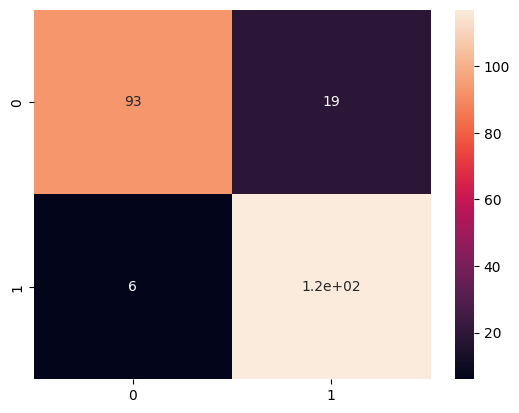

In [76]:
CM=confusion_matrix(y_test,y_pred_rfe)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred_rfe)
acc= accuracy_score(y_test, y_pred_rfe)
roc=roc_auc_score(y_test, y_pred_rfe)
prec = precision_score(y_test, y_pred_rfe)
rec = recall_score(y_test, y_pred_rfe)
f1 = f1_score(y_test, y_pred_rfe)

mathew = matthews_corrcoef(y_test, y_pred_rfe)
model_results =pd.DataFrame([['Random Forest',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

In [77]:
import pandas as pd
from sklearn.metrics import confusion_matrix, log_loss, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, matthews_corrcoef

# Initialize an empty DataFrame to store results
# model_results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F1 Score', 'ROC', 'Log_Loss', 'mathew_corrcoef'])

# Dictionary of model predictions
data = {
    
    'KNN': y_pred_knn,
 
    'SVC': y_pred_svc,
    'SGD': y_pred_sgd,
    'Adaboost': y_pred_ada,
   
}

models = pd.DataFrame(data)

for column in models:
    CM = confusion_matrix(y_test, models[column])
    
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    
    specificity = TN / (TN + FP)
    loss_log = log_loss(y_test, models[column])
    acc = accuracy_score(y_test, models[column])
    roc = roc_auc_score(y_test, models[column])
    prec = precision_score(y_test, models[column])
    rec = recall_score(y_test, models[column])
    f1 = f1_score(y_test, models[column])
    mathew = matthews_corrcoef(y_test, models[column])
    
    results = pd.DataFrame(
        [[column, acc, prec, rec, specificity, f1, roc, loss_log, mathew]],
        columns=['Model', 'Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F1 Score', 'ROC', 'Log_Loss', 'mathew_corrcoef']
    )
    
    # Use pd.concat() to append the results
    model_results = pd.concat([model_results, results], ignore_index=True)

model_results


,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Random Forest,0.893617,0.860294,0.951220,0.830357,0.903475,0.890788,3.834431,0.790580
1,KNN,0.808511,0.786765,0.869919,0.741071,0.826255,0.805495,6.901976,0.618029
2,SVC,0.825532,0.801471,0.886179,0.758929,0.841699,0.822554,6.288467,0.652539
3,SGD,0.817021,0.781690,0.902439,0.723214,0.837736,0.812827,6.595222,0.639013
4,Adaboost,0.834043,0.813433,0.886179,0.776786,0.848249,0.831482,5.981713,0.668866


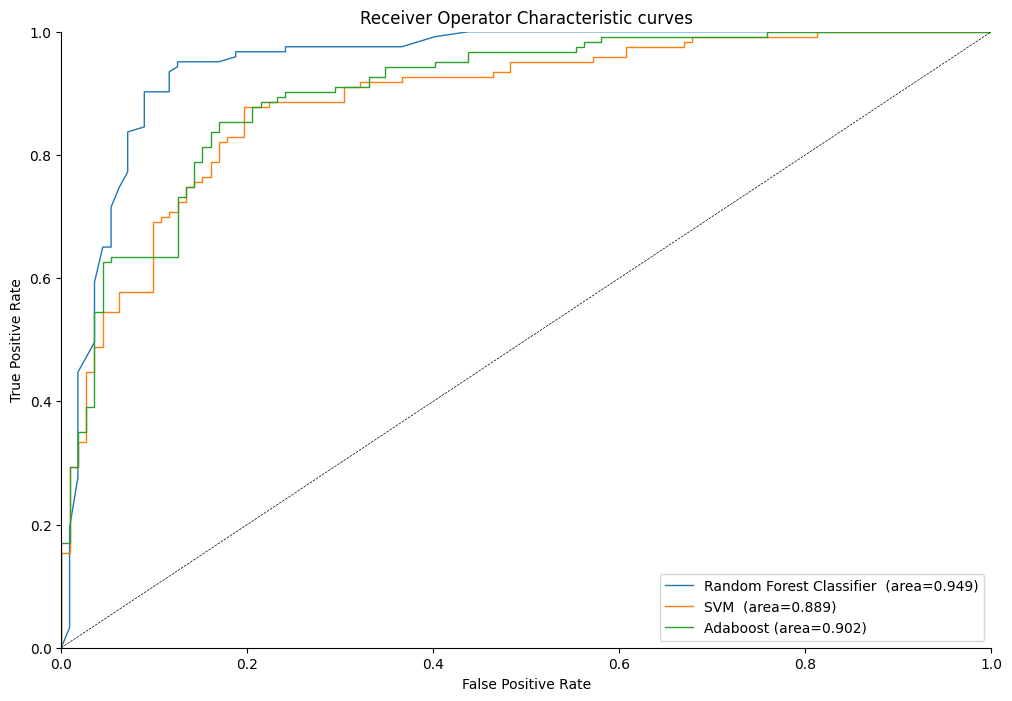

In [78]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))


roc_auc_plot(y_test,rf_ent.predict_proba(X_test),label='Random Forest Classifier ',l='-')
roc_auc_plot(y_test,svc.predict_proba(X_test),label='SVM ',l='-')
roc_auc_plot(y_test,ada.predict_proba(X_test),label='Adaboost',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()

# Feature importance

<Axes: >

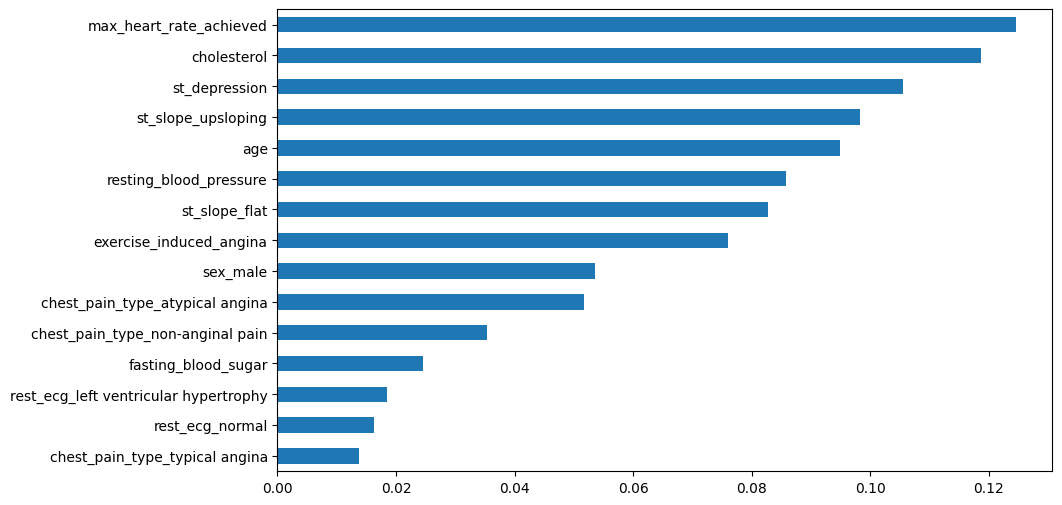

In [79]:
feat_importances = pd.Series(rf_ent.feature_importances_, index=X_train.columns)
feat_importances.sort_values().plot(kind="barh",figsize=(10, 6))

Test

In [84]:
new_data = np.array([[0.693878,	0.301075,	0.572301,	0	,0.266667,	0	,0.376623,	1	,1,	0,	0,	1,	0,	1,	0]])
prediction=rf_ent.predict(new_data)
if prediction==0:
    print("not")
else:
    print("have")

have


c:\Users\US\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [85]:
new_data = np.array([[0.469388,0.408602,0.456212,0,0.614815,0,0.194805,1,1,0,0,0,1,0,1]])
prediction=rf_ent.predict(new_data)
if prediction==0:
    print("not")
else:
    print("have")

not


c:\Users\US\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [82]:
X_test

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping
1024,0.693878,0.301075,0.572301,0,0.266667,0,0.376623,1,1,0,0,1,0,1,0
182,0.469388,0.408602,0.456212,0,0.614815,0,0.194805,1,1,0,0,0,1,0,1
785,0.346939,0.494624,0.480652,0,0.629630,1,0.220779,0,0,0,0,1,0,1,0
924,0.591837,0.623656,0.562118,0,0.333333,1,0.272727,1,0,0,0,1,0,1,0
780,0.612245,0.387097,0.527495,0,0.466667,1,0.584416,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0.530612,0.301075,0.501018,0,0.318519,0,0.194805,1,1,0,0,0,1,0,1
892,0.571429,0.301075,0.480652,0,0.822222,0,0.298701,1,1,0,0,0,1,0,1
12,0.224490,0.301075,0.415479,0,0.577778,0,0.194805,1,1,0,0,0,1,0,1
349,0.836735,0.483871,0.000000,0,0.274074,1,0.402597,1,0,0,0,0,0,1,0


In [83]:
y_test

1024    1
182     0
785     0
924     1
780     1
       ..
125     0
892     0
12      0
349     1
357     1
Name: target, Length: 235, dtype: int64

In [86]:
# model export
# Assuming svc_model is your trained SVM model
import pickle
model_filename = 'rf_heart_model.pkl'

# Save the model to a file
with open(model_filename, 'wb') as file:
    pickle.dump(rf_ent, file)

print(f"Model saved to {model_filename}")


Model saved to rf_heart_model.pkl
